## Schrodinger FEP+ dataset visualisation

In [4]:
import os
import sys
import pickle
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
def getDirNames(path):
    return [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [6]:
def removeNaN(df):
    df = df.dropna(axis=1, how='all')
    return df.dropna(subset='Ligand')

In [7]:
data = pd.read_excel(r'../ja512751q_si_003.xlsx', sheet_name='dG')
data = removeNaN(data)
data.to_csv('../data/summary_data.csv', index=False)

In [16]:
def regplot_grouped(data, true_col, pred_col, group_col, pred_err_col=None, outpath=None):

    pr = stats.pearsonr(data[true_col], data[pred_col])[0]
    sr = stats.spearmanr(data[true_col], data[pred_col])[0]
    rmse = np.sqrt(mean_squared_error(data[true_col], data[pred_col]))

    lims = [min(data[true_col].min(), data[pred_col].min())-0.5, max(data[true_col].max(), data[pred_col].max())+0.5]
    
    g = sns.jointplot(data=data, 
                       x=true_col,
                       y=pred_col, 
                       hue=group_col, 
                       xlim=lims,
                       ylim=lims)
        

    if pred_err_col is not None:
        g.ax_joint.errorbar(data[true_col], data[pred_col], yerr=data[pred_err_col], color='grey', fmt="none", alpha=0.25)

    g.ax_joint.set_xlabel(xlabel='Exp. $\Delta$G (kcal/mol)')
    g.ax_joint.set_ylabel(ylabel='Pred. $\Delta$G (kcal/mol)')

    g.ax_joint.plot(lims, lims, linestyle='--', color='black', alpha=0.5)
    
    g.ax_joint.text(
        0.7,
        0.05,
        f"RMSE = {rmse:.2f} | Pearson's $r$ = {pr:.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        bbox={"boxstyle": "round", "facecolor": "white", "alpha": 0.25},
        transform=g.ax_joint.transAxes,
    )

    if outpath is not None:
        plt.tight_layout()
        plt.savefig(outpath)
    



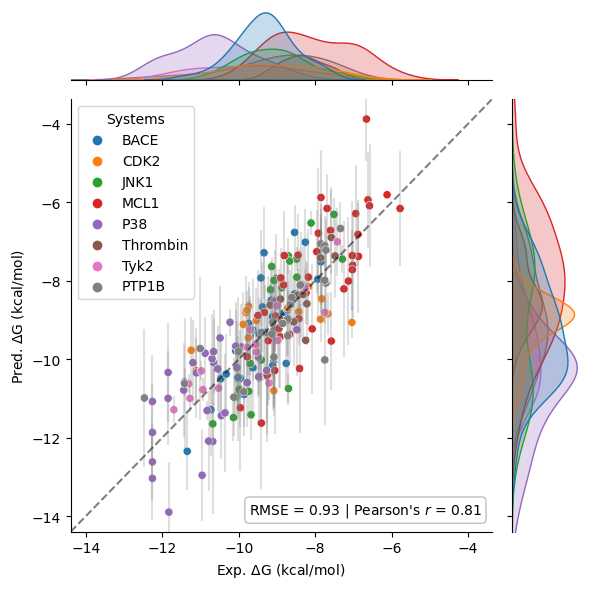

In [17]:
regplot_grouped(data, 'Exp. dG', 'Pred. dG', 'Systems', 'Pred. Error', outpath='../plots/regplot_grouped.png' )

In [15]:
def distplot(data, x_col, group_col, outpath=None):
    
    plt.subplots(figsize=(5,5))
    sns.kdeplot(data=data, x=x_col, hue=group_col, fill=True, alpha=0.1)
    
    if outpath is not None:
        plt.tight_layout()
        plt.savefig(outpath)

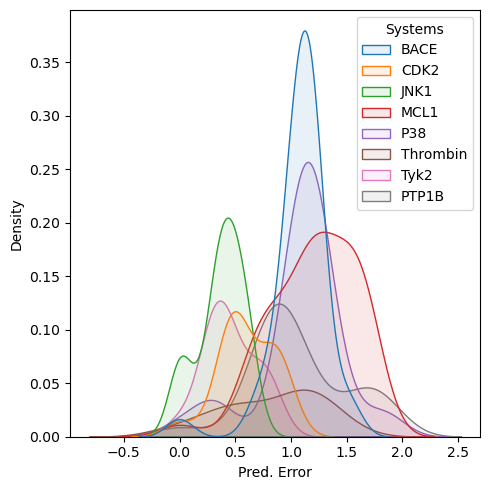

In [40]:
distplot(data, 'Pred. Error', 'Systems', outpath='../plots/kdeplot_pred_errors.png')

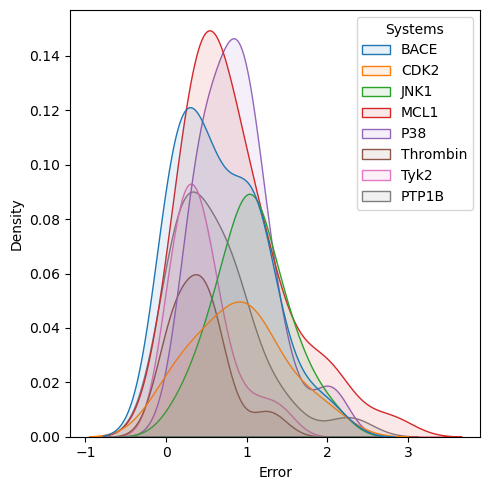

In [41]:
distplot(data, 'Error', 'Systems', outpath='../plots/kdeplot_errors.png')

In [48]:
data[data.Error > 2.0]

,Systems,Ligand,Exp. dG,Pred. dG,Pred. Error,Rel. dG,Error,Error^2
8,BACE,CAT-4l,-9.340,-7.29000,1.17,1.54,2.05000,4.202500
37,CDK2,17,-7.041,-9.06425,0.40,-0.91,2.02325,4.093541
57,JNK1,18660-1,-8.700,-10.75000,0.38,-2.57,2.05000,4.202500
99,MCL1,48,-6.660,-3.88000,1.06,1.93,2.78000,7.728400
108,MCL1,58,-9.410,-11.63000,1.68,-5.82,2.22000,4.928400
128,P38,p38a_3fmk,-11.830,-13.90000,1.29,-5.38,2.07000,4.284900
199,PTP1B,23484,-7.750,-10.02000,1.65,-0.93,2.27000,5.170000
